# WeatherPy

## Observations

Three observation that we can see are the following

* In the temperature vs Latitude plot we can see that both poles are not at the same temperature, the south pole is hotter.

* In the southern hemispher, wind speed tends to decrease as we get closer to the equator, but it is the opposite with the humidity, it increases as we reach the equator.

* The wind speed is higher in the northern hemisphere, and increses as it gets closer to the north pole.

### Extracting Data

In [24]:
import pandas as pd
import numpy as np
import json 
from citipy import citipy
import requests
import matplotlib.pyplot as plt

from api_keys import api_key_ow

In [64]:
# Latitues and longitudes 
coordinates = pd.DataFrame({"Lat":(np.random.uniform(-90,90,1500)), "Long":(np.random.uniform(-180,180,1500))})
coordinates.head()

,Lat,Long
0,62.826723,36.017368
1,51.332753,-92.225119
2,-83.108584,66.407045
3,87.363507,113.287018
4,-33.021101,171.599580


In [65]:
# Finding the closest city to the generated coordinates
cities_name = []
countrycode = []

for i in range(0, len(coordinates["Lat"])):
    lat = coordinates.iloc[i]["Lat"]
    long = coordinates.iloc[i]["Long"]
    city = citipy.nearest_city(lat, long)
    name = city.city_name
    cities_name.append(name)
    country = city.country_code
    countrycode.append(country)
    
coordinates['City'] = cities_name
coordinates['Country'] = countrycode
#coordinates.head()

In [66]:
# Deleting duplicated cities
cities = coordinates.drop_duplicates("City", keep='first')
cities.head()

,Lat,Long,City,Country
0,62.826723,36.017368,pudozh,ru
1,51.332753,-92.225119,sioux lookout,ca
2,-83.108584,66.407045,taolanaro,mg
3,87.363507,113.287018,saskylakh,ru
4,-33.021101,171.599580,ahipara,nz


In [ ]:
# Print the name and address of the first restaurant that appears
#print(places_data["results"][0]["name"])
#print(places_data["results"][0]["vicinity"])

In [28]:
len(cities)

615

In [29]:
# Creating the new columns
cities["Temperature (F)"] = ""
cities["Max Temp (F)"] = ""
cities["Humidity (%)"] = ""
cities["Cloudiness (%)"] = ""
cities["Wind Speed (mph)"] = ""

cities.head()

//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the docume

,Lat,Long,City,Country,Temperature (F),Max Temp (F),Humidity (%),Cloudiness (%),Wind Speed (mph)
0,52.146062,14.819762,eisenhuttenstadt,de,,,,,
1,-39.286421,-20.473077,arraial do cabo,br,,,,,
2,-16.217548,-50.558190,itapirapua,br,,,,,
3,38.408636,26.646115,urla,tr,,,,,
4,-5.874882,-39.242680,acopiara,br,,,,,


### Retrieving the weather data for each city

In [30]:
# Base url
url = "http://api.openweathermap.org/data/2.5/weather?"

# Query url
query_url = url + "appid=" + api_key_ow + "&q="

In [31]:
print("----------------------------------")

for index, row in cities.iterrows():
    response = requests.get(query_url + row["City"].replace(" ","+") + "&units=imperial").json()
    results = response
    #print(row["City"].replace(" ","+"))
    #print(query_url + row["City"].replace(" ","+") + "&units=imperial")
    
    try:
        print(f"Retrieving results for Index = {index}: {row[2]}")
        cities.loc[index, "Lat"] = results["coord"]["lat"]
        cities.loc[index, "Long"] = results["coord"]["lon"]
        cities.loc[index, "Temperature (F)"] = results["main"]["temp"]
        cities.loc[index, "Max Temp (F)"] = results["main"]["temp_max"]
        cities.loc[index, "Humidity (%)"] = results["main"]["humidity"]
        cities.loc[index, "Cloudiness (%)"] = results["clouds"]["all"]
        cities.loc[index, "Wind Speed (mph)"] = results["wind"]["speed"]
    except (KeyError, IndexError):
        print("Missing field/result... skipping.")
        
print("----------------------------------")
print("Data Retrieval Complete")
print("----------------------------------")

----------------------------------
Retrieving results for Index = 0: eisenhuttenstadt
Missing field/result... skipping.
Retrieving results for Index = 1: arraial do cabo


//anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


Retrieving results for Index = 2: itapirapua
Retrieving results for Index = 3: urla
Retrieving results for Index = 4: acopiara
Retrieving results for Index = 5: umm durman
Missing field/result... skipping.
Retrieving results for Index = 6: albany
Retrieving results for Index = 7: louisbourg
Missing field/result... skipping.
Retrieving results for Index = 8: talnakh
Retrieving results for Index = 9: carnarvon
Retrieving results for Index = 10: neryungri
Retrieving results for Index = 11: richards bay
Retrieving results for Index = 12: florence
Retrieving results for Index = 13: georgetown
Retrieving results for Index = 14: hermanus
Retrieving results for Index = 16: nikolskoye
Retrieving results for Index = 17: yellowknife
Retrieving results for Index = 18: hithadhoo
Retrieving results for Index = 19: butaritari
Retrieving results for Index = 20: torbay
Retrieving results for Index = 21: port alfred
Retrieving results for Index = 22: jamestown
Retrieving results for Index = 23: cape tow

Retrieving results for Index = 254: garden city
Retrieving results for Index = 256: samusu
Missing field/result... skipping.
Retrieving results for Index = 259: vodnyy
Retrieving results for Index = 260: sao raimundo nonato
Retrieving results for Index = 261: castro
Retrieving results for Index = 262: mocuba
Retrieving results for Index = 269: taquara
Retrieving results for Index = 270: mahebourg
Retrieving results for Index = 271: lompoc
Retrieving results for Index = 272: vanimo
Retrieving results for Index = 273: ballina
Retrieving results for Index = 276: kaitangata
Retrieving results for Index = 277: caravelas
Retrieving results for Index = 278: salalah
Retrieving results for Index = 279: skjervoy
Retrieving results for Index = 280: bordighera
Retrieving results for Index = 283: nuevitas
Retrieving results for Index = 287: wichita falls
Retrieving results for Index = 289: iqaluit
Retrieving results for Index = 293: tuktoyaktuk
Retrieving results for Index = 295: half moon bay
Retr

Retrieving results for Index = 693: florianopolis
Retrieving results for Index = 695: nanortalik
Retrieving results for Index = 700: udala
Retrieving results for Index = 701: ust-maya
Retrieving results for Index = 703: san juan
Retrieving results for Index = 704: ust-kamchatsk
Missing field/result... skipping.
Retrieving results for Index = 708: melbu
Retrieving results for Index = 714: ruteng
Retrieving results for Index = 715: lamar
Retrieving results for Index = 716: dunedin
Retrieving results for Index = 717: conde
Retrieving results for Index = 720: moussoro
Retrieving results for Index = 725: vao
Retrieving results for Index = 727: valls
Retrieving results for Index = 732: vardo
Retrieving results for Index = 733: malm
Retrieving results for Index = 734: husavik
Retrieving results for Index = 736: lorengau
Retrieving results for Index = 738: hambantota
Retrieving results for Index = 740: rungata
Missing field/result... skipping.
Retrieving results for Index = 741: outjo
Retrievi

Retrieving results for Index = 1199: attawapiskat
Missing field/result... skipping.
Retrieving results for Index = 1200: bilibino
Retrieving results for Index = 1202: mairana
Retrieving results for Index = 1205: veraval
Retrieving results for Index = 1208: mitsamiouli
Retrieving results for Index = 1209: iguape
Retrieving results for Index = 1213: mys shmidta
Missing field/result... skipping.
Retrieving results for Index = 1220: lujan
Retrieving results for Index = 1226: port keats
Retrieving results for Index = 1228: juegang
Retrieving results for Index = 1231: ambovombe
Retrieving results for Index = 1232: melilla
Retrieving results for Index = 1233: tezu
Retrieving results for Index = 1235: arandelovac
Missing field/result... skipping.
Retrieving results for Index = 1240: xining
Retrieving results for Index = 1241: shimoda
Retrieving results for Index = 1244: northam
Retrieving results for Index = 1254: wavre
Retrieving results for Index = 1259: stony mountain
Retrieving results for

In [32]:
cities.head()

,Lat,Long,City,Country,Temperature (F),Max Temp (F),Humidity (%),Cloudiness (%),Wind Speed (mph)
0,52.146062,14.819762,eisenhuttenstadt,de,,,,,
1,-22.970000,-42.030000,arraial do cabo,br,71.6,71.6,88,92,10.29
2,-15.820000,-50.610000,itapirapua,br,69.31,69.31,74,14,3.18
3,38.320000,26.760000,urla,tr,56.91,59,87,25,4.7
4,-6.100000,-39.450000,acopiara,br,71.83,71.83,93,52,2.08


In [33]:
# Saving the dataframe to a csv file
cities.to_csv("Weather_per_city.csv", encoding = "utf-8", index = False)

In [34]:
cities["Lat"] = pd.to_numeric(cities["Lat"])
cities["Temperature (F)"] = pd.to_numeric(cities["Temperature (F)"])
cities["Max Temp (F)"] = pd.to_numeric(cities["Max Temp (F)"])
cities["Humidity (%)"] = pd.to_numeric(cities["Humidity (%)"])
cities["Cloudiness (%)"] = pd.to_numeric(cities["Cloudiness (%)"])
cities["Wind Speed (mph)"] = pd.to_numeric(cities["Wind Speed (mph)"])

//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.or

## Plotting data

### Temperature (F) vs. Latitude

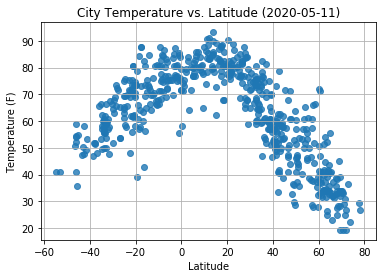

In [37]:
plt.scatter(cities["Lat"], cities["Temperature (F)"], alpha = 0.8)
plt.title("City Temperature vs. Latitude (2020-05-11)")
plt.xlabel("Latitude")
plt.ylabel("Temperature (F)")
plt.grid()
plt.savefig("City_Temperature-Latitude.png")
plt.show()

In this plot we analysed the temperature as a function of the latitude. We can see that when latitude is zero, the temperature is higher, which is supposed to happen in the equator

### Humidity (%) vs. Latitude

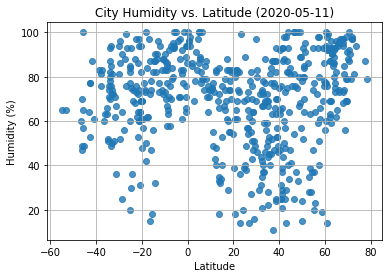

In [38]:
# Plot of Humidity (%) vs. Latitude
plt.scatter(cities["Lat"], cities["Humidity (%)"], alpha = 0.8)
plt.title("City Humidity vs. Latitude (2020-05-11)")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid()
plt.savefig("City_Humidity-Latitude.png")
plt.show()

In this plot we can see a city's humidity as a function of the latitude. We can see that the more humid cities are located in the north hemisphere.

### Cloudiness (%) vs. Latitude

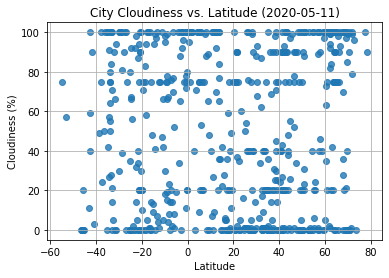

In [39]:
# Plot of Cloudiness (%) vs. Latitude
plt.scatter(cities["Lat"], cities["Cloudiness (%)"], alpha = 0.8)
plt.title("City Cloudiness vs. Latitude (2020-05-11)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid()
plt.savefig("City_Cloudiness-Latitude.png")
plt.show()

The cloudyness in a city is plotted here as a function of the latitude. It almost seems that cities with a certain temperature have the same percentage of cloudiness.

### Wind Speed (mph) vs. Latitude

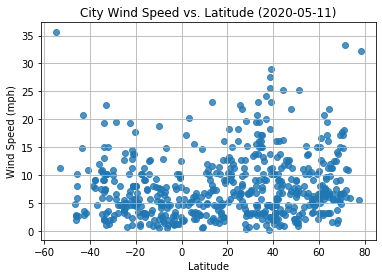

In [40]:
# Plot of Wind Speed (mph) vs. Latitude
plt.scatter(cities["Lat"], cities["Wind Speed (mph)"], alpha = 0.8)
plt.title("City Wind Speed vs. Latitude (2020-05-11)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.grid()
plt.savefig("City_wind_speed-Latitude.png")
plt.show()

In this plot we see the wind speed in a city as a function of the latitude. It seems that, in general, the wind speed stays below 20 mph all around the world.

## Linear regression for each hemisphere

In [41]:
from scipy.stats import linregress

# Function to compute regressions
def regression(xs, ys):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(xs, ys)
    regress_values = xs * slope + intercept
    plt.plot(xs, regress_values, "r-")
    return slope, intercept, rvalue

In [42]:
# Creating the northern and southern hemispheres DataFrames
cities = cities.dropna()
lat_positive = cities.loc[(cities["Lat"]>=0)]
lat_negative = cities.loc[(cities["Lat"]<0)]

### Northern and Southern Hemispheres - Temperature (F) vs. Latitude

The r-squared value is: -0.8709816658319937


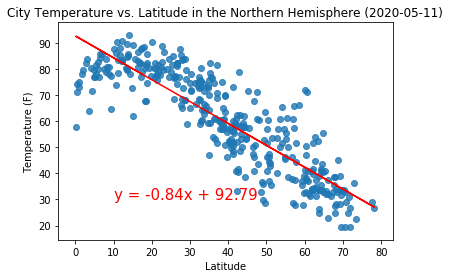

In [45]:
# Northern Hemisphere - Temperature (F) vs. Latitude
x = lat_positive["Lat"]
y = lat_positive["Temperature (F)"]

m, b, r = regression(x, y)
plt.scatter(x, y, alpha = 0.8)

line_eq = "y = " + str(round(m, 2)) + "x + " + str(round(b, 2))
plt.annotate(line_eq, (10,30), fontsize=15, color="red")
plt.title("City Temperature vs. Latitude in the Northern Hemisphere (2020-05-11)")
plt.xlabel("Latitude")
plt.ylabel("Temperature (F)")
plt.savefig("Northern_city_temperature-Latitude.png")
print(f"The r-squared value is: {r}")
plt.show()

The r-squared value is: 0.7502746304280165


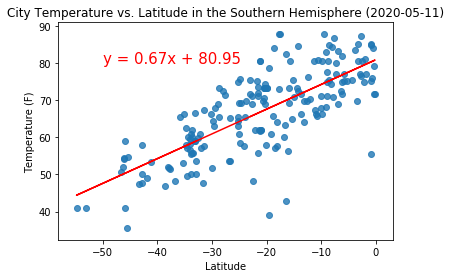

In [59]:
# Southern Hemisphere - Temperature (F) vs. Latitude
x = lat_negative["Lat"]
y = lat_negative["Temperature (F)"]

m, b, r = regression(x, y)

line_eq = "y = " + str(round(m, 2)) + "x + " + str(round(b, 2))
plt.annotate(line_eq, (-50,80), fontsize=15, color="red")
plt.scatter(x, y, alpha = 0.8)

plt.title("City Temperature vs. Latitude in the Southern Hemisphere (2020-05-11)")
plt.xlabel("Latitude")
plt.ylabel("Temperature (F)")
plt.savefig("Southern_city_temperature-Latitude.png")
print(f"The r-squared value is: {r}")
plt.show()

In the northern hemisphere plot we are doing a linear regression that is modeling the City's temperature as a function of the latitude in the northern hemisphere. We notice that as the latitude increases the temperature decreases.

In the southern hemisphere plot we have the regression that shows a positive slope, which means that the temperature rises as we approach the equator.

### Northern and Southern Hemispheres - Humidity (%) vs. Latitude

The r-squared value is: 0.15078471607348198


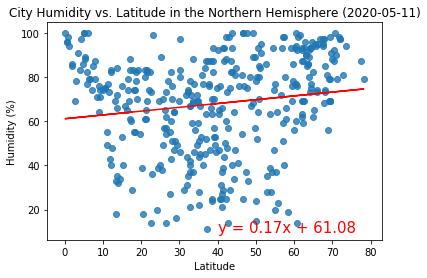

In [48]:
# Northern Hemisphere - Humidity (%) vs. Latitude
x = lat_positive["Lat"]
y = lat_positive["Humidity (%)"]

m, b, r = regression(x, y)
plt.scatter(x, y, alpha = 0.8)

line_eq = "y = " + str(round(m, 2)) + "x + " + str(round(b, 2))
plt.annotate(line_eq, (40,10), fontsize=15, color="red")
plt.title("City Humidity vs. Latitude in the Northern Hemisphere (2020-05-11)")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.savefig("Northern_city_humidity-Latitude.png")
print(f"The r-squared value is: {r}")
plt.show()

The r-squared value is: 0.2726009430573694


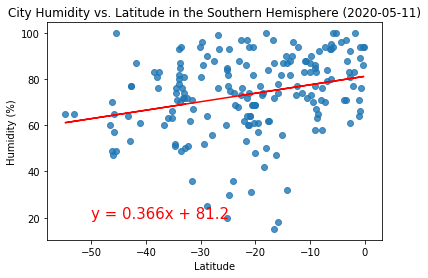

In [50]:
# Southern Hemisphere - Humidity (%) vs. Latitude
x = lat_negative["Lat"]
y = lat_negative["Humidity (%)"]

m, b, r = regression(x, y)
plt.scatter(x, y, alpha = 0.8)

line_eq = "y = " + str(round(m, 4)) + "x + " + str(round(b, 2))
plt.annotate(line_eq, (-50,20), fontsize=15, color="red")
plt.title("City Humidity vs. Latitude in the Southern Hemisphere (2020-05-11)")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.savefig("Southern_city_humidity-Latitude.png")
print(f"The r-squared value is: {r}")
plt.show()

In the first plot (northern hemisphere) we have a linear regression of humidity as a function of the latitude. We notice that there is no trend in the humidity of a city.

In the second plot, we did a linear regression as well, but now, in the southern hemisphere. Here we can see that the mayority of humid cities are closer to the equator.

### Northern and Southern Hemispheres - Cloudiness (%) vs. Latitude

The r-squared value is: 0.12019243171761944


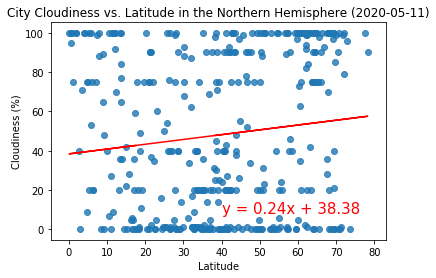

In [52]:
# Northern Hemisphere - Cloudiness (%) vs. Latitude
x = lat_positive["Lat"]
y = lat_positive["Cloudiness (%)"]

m, b, r = regression(x, y)
plt.scatter(x, y, alpha = 0.8)

line_eq = "y = " + str(round(m, 2)) + "x + " + str(round(b, 2))
plt.annotate(line_eq, (40,8), fontsize=15, color="red")
plt.title("City Cloudiness vs. Latitude in the Northern Hemisphere (2020-05-11)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.savefig("Northern_city_cloudiness-Latitude.png")
print(f"The r-squared value is: {r}")
plt.show()

The r-squared value is: 0.08016110230122561


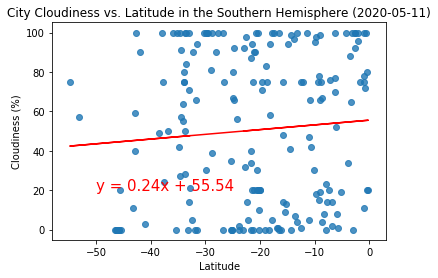

In [54]:
# Southern Hemisphere - Cloudiness (%) vs. Latitude
x = lat_negative["Lat"]
y = lat_negative["Cloudiness (%)"]

m, b, r = regression(x, y)
plt.scatter(x, y, alpha = 0.8)

line_eq = "y = " + str(round(m, 2)) + "x + " + str(round(b, 2))
plt.annotate(line_eq, (-50,20), fontsize=15, color="red")
plt.title("City Cloudiness vs. Latitude in the Southern Hemisphere (2020-05-11)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.savefig("Southern_city_cloudiness-Latitude.png")
print(f"The r-squared value is: {r}")
plt.show()

In these two plot we have a linear regession of the cloudiness of a city as a function of the latitude. In the first plot (norhern hemisphere), we see that the data is spread out. With a tendency to have more cities with either no clouds or completely cloudy.

In the southern hemisphere (second plot) we see a negative trend in the cloudinees, and we see that the contries with more clouds are the ones closest to the equator.

### Northern and Southern Hemispheres - Wind Speed (mph) vs. Latitude

The r-squared value is: 0.11943548199890813


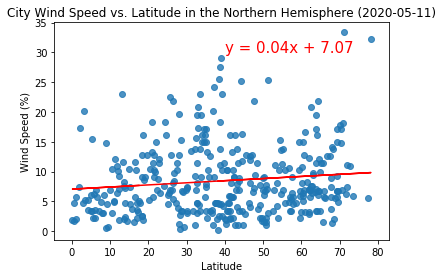

In [56]:
# Northern Hemisphere - Wind Speed (mph) vs. Latitude
x = lat_positive["Lat"]
y = lat_positive["Wind Speed (mph)"]

m, b, r = regression(x, y)
plt.scatter(x, y, alpha = 0.8)

line_eq = "y = " + str(round(m, 2)) + "x + " + str(round(b, 2))
plt.annotate(line_eq, (40,30), fontsize=15, color="red")
plt.title("City Wind Speed vs. Latitude in the Northern Hemisphere (2020-05-11)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (%)")
plt.savefig("Northern_city_wind-Latitude.png")
print(f"The r-squared value is: {r}")
plt.show()

The r-squared value is: -0.24995243793734065


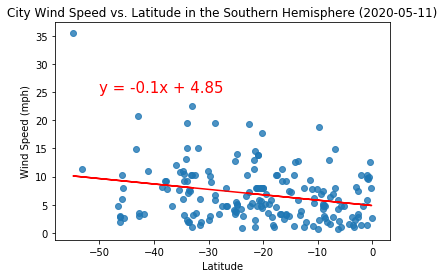

In [58]:
# Southern Hemisphere - Wind Speed (mph) vs. Latitude
x = lat_negative["Lat"]
y = lat_negative["Wind Speed (mph)"]

m, b, r = regression(x, y)
plt.scatter(x, y, alpha = 0.8)

line_eq = "y = " + str(round(m, 2)) + "x + " + str(round(b, 2))
plt.annotate(line_eq, (-50,25), fontsize=15, color="red")
plt.title("City Wind Speed vs. Latitude in the Southern Hemisphere (2020-05-11)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.savefig("Southern_city_wind-Latitude.png")
print(f"The r-squared value is: {r}")
plt.show()

In the final two plots we have a regression on both, the northern and southern hemispheres, of the wind speed in a city.

In the northern hemisphere the trend is positive and the wind speed stays, in general, below 20 mph. In the southern hemisphere we have a negative trend, which again shows a cities with a wind speed below 20 mph, but now, decreasing as the city get closer to the equator.